## Clustering Assignment

### Overview 
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# 1. Read and visualise the data

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

import matplotlib.ticker as plticker
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [105]:
df_ngo = pd.read_csv('Country-data.csv')

df_ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [106]:
df_ngo.shape

(167, 10)

In [107]:
df_ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


In [108]:
df_ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# 2. Clean the data

In [110]:
df_ngo.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- None of the columns have null values hence no imputation or drop required.

In [111]:
df_ngo.dtypes

country       object 
child_mort    float64
exports       float64
health        float64
imports       float64
income        int64  
inflation     float64
life_expec    float64
total_fer     float64
gdpp          int64  
dtype: object

 No conversion is required as, no columns have inconsistent datatype, 

In [113]:
# Duplicates check

df_ngo.loc[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [114]:
# segregation of Numerical and Categorical Variables

categorical = df_ngo.select_dtypes(include = ['object']).columns
numerical = df_ngo.select_dtypes(exclude = ['object']).columns

# 3. Visualiztion of Data

(9.5, -0.5)

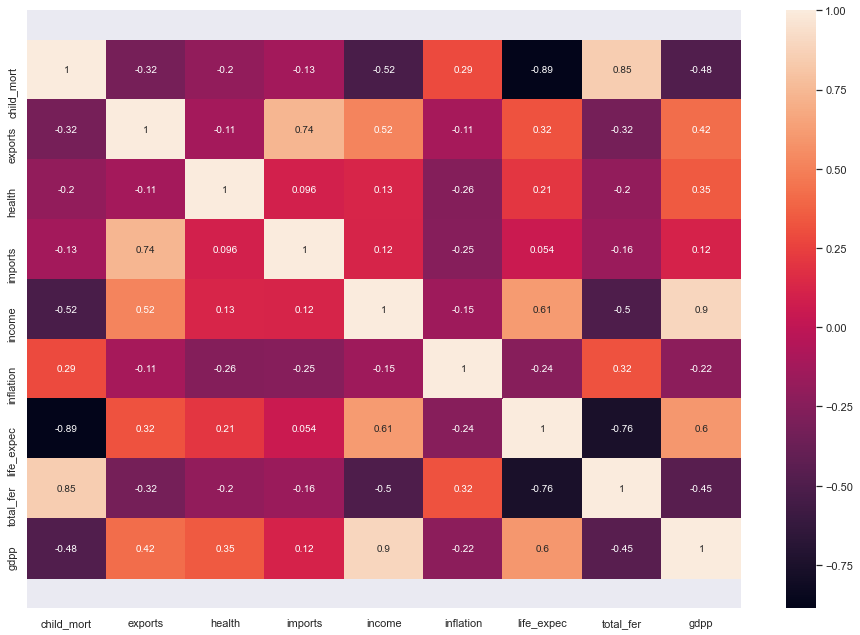

In [115]:
plt.figure(figsize = (16,11))        
vs = sns.heatmap(df_ngo.corr(),annot = True)
bottom, top = vs.get_ylim()
vs.set_ylim(bottom + 0.5, top - 0.5)

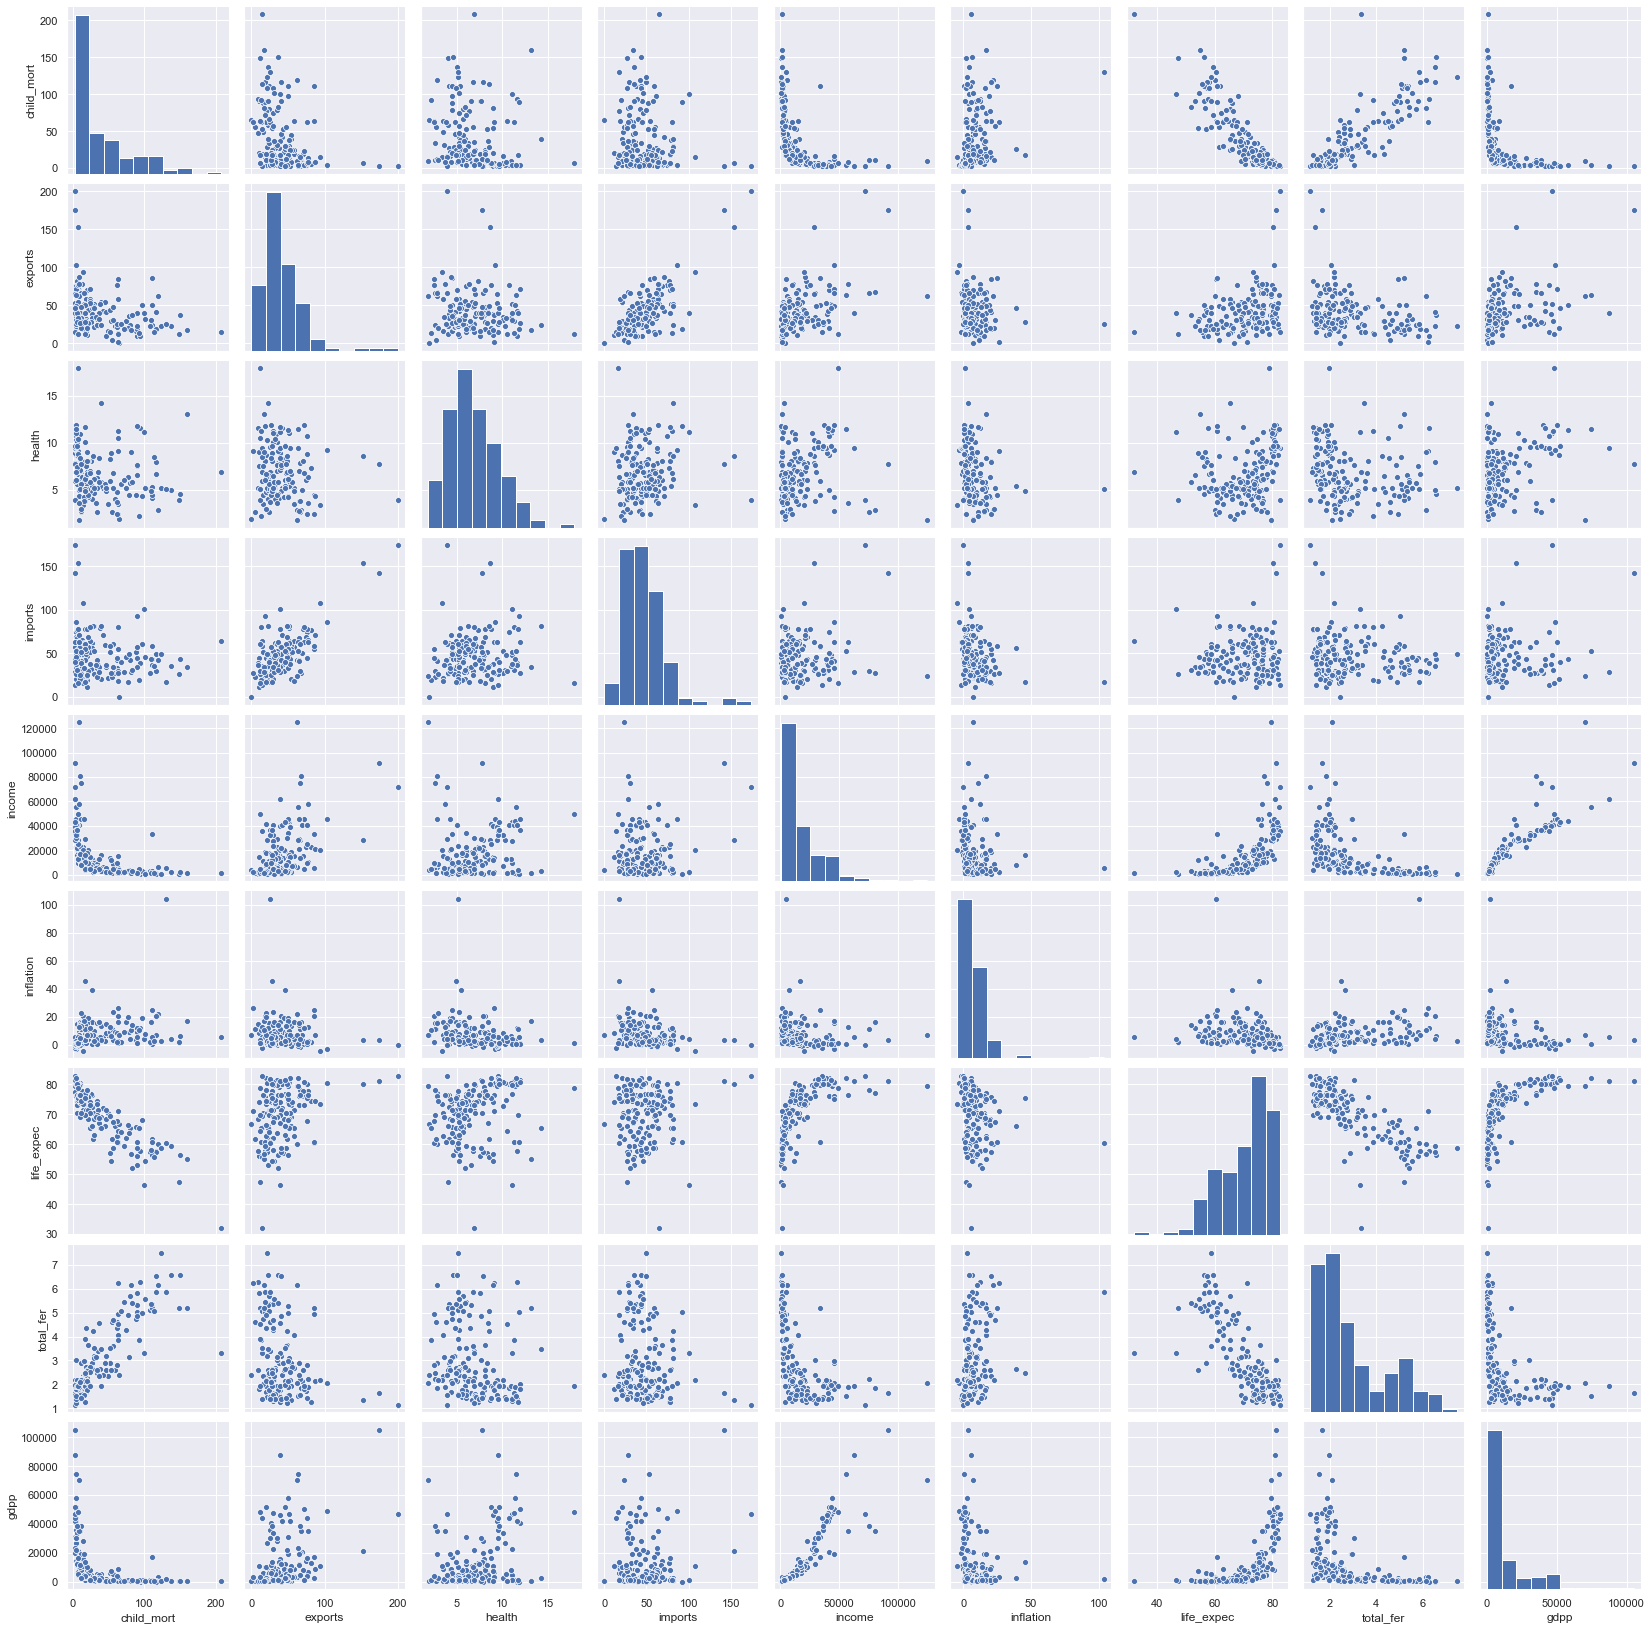

In [116]:
# Numeric Columns
sns.pairplot(df_ngo)

# 4. Data Preperation 

In [117]:
# Converting percentages to absolute values.
df_ngo['health'] = df_ngo['health'] * df_ngo['gdpp']/100
df_ngo['imports'] = df_ngo['imports'] * df_ngo['gdpp']/100
df_ngo['exports'] = df_ngo['exports'] * df_ngo['gdpp']/100

In [118]:
df_ngo.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


In [119]:
# Dropping Country field as final dataframe will only contain data columns

ngo_df_drop = df_ngo.copy()
ngo = ngo_df_drop.pop('country')

In [120]:
ngo_df_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


#### Rescaling

In [121]:
# Standarisation technique for scaling

warnings.filterwarnings("ignore")
scl = StandardScaler()
df_ngo_scaled = scl.fit_transform(ngo_df_drop)

In [122]:
df_ngo_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

## 5.PCA Application

Application used by the United Nations to calculate the Human Development Index(HDI) to rank countries on the basis of their development. We are doing PCA because we want to remove the redundancies in the data and find the most important directions where the aligned data lies.

Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. 

In [124]:
p = PCA(svd_solver='randomized', random_state=42)

In [125]:
# applying PCA on the scaled data
p.fit(df_ngo_scaled)

PCA(random_state=42, svd_solver='randomized')

In [126]:
# Creation of PCA components 

p.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [128]:
# Variance Ratio

p.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

Text(0, 0.5, 'V Ratio')

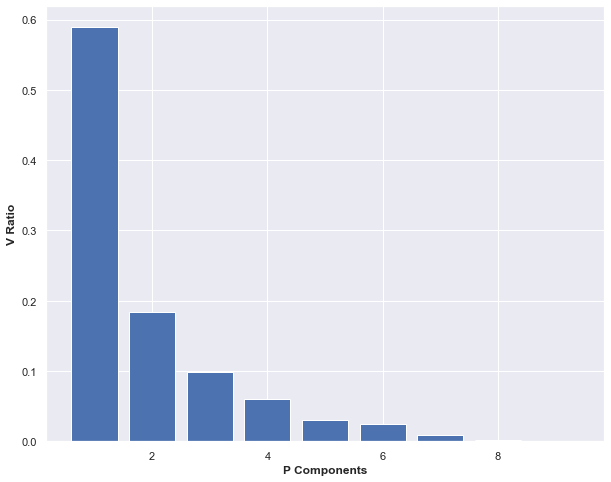

In [131]:
# Variance Ratio bar plot for each PCA components.
vs = plt.bar(range(1,len(p.explained_variance_ratio_)+1), p.explained_variance_ratio_)
plt.xlabel("P Components",fontweight = 'bold')
plt.ylabel("V Ratio",fontweight = 'bold')

    First component variance  is almost 60% explained
    Second component variance  is almost 20% explained

In [132]:
ngo_col = list(df_ngo.drop(['country'],axis=1).columns)
attri_p = pd.DataFrame({'Attri':ngo_col,'P1':p.components_[0],'P2':p.components_[1],'P3':p.components_[2]})

In [133]:
attri_p

,Attri,P1,P2,P3
0,child_mort,-0.3164,0.4763,-0.1500
1,exports,0.3429,0.3973,-0.0306
2,health,0.3585,0.1551,-0.0757
3,imports,0.3449,0.3708,-0.0722
4,income,0.3800,0.1284,0.1458
5,inflation,-0.1431,0.2213,0.9484
6,life_expec,0.3439,-0.3698,0.1968
7,total_fer,-0.3028,0.4597,-0.0778
8,gdpp,0.4000,0.2006,0.0103


1. Life expectency,gdpp,income and health are well explained by P1.
2. Imports and exports are explained good by both the components P1 and P2.
3. Inflation is not explained by P1 or with P2
4. Child mortality and total fertility are explained good by P2.
5. Inflation is explained well by P3

90% variance is explained by 3 principal components, building the dataframe using those 3 components will be better move

In [136]:
# Building the dataframe using Incremental PCA for better efficiency.

incre_p = IncrementalPCA(n_components=3)

In [137]:
# Fitting the scaled df on incremental pca

df_incre_p = incre_p.fit_transform(df_ngo_scaled)
df_incre_p

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [138]:
# Creating new dataframe with Principal components

df_p = pd.DataFrame(df_incre_p, columns=["P1", "P2","P3"])
df_p_final = pd.concat([country, df_p], axis=1)
df_p_final.head()

,country,P1,P2,P3
0,Afghanistan,-2.6374,1.4690,-0.5414
1,Albania,-0.0223,-1.4319,-0.0207
2,Algeria,-0.4576,-0.6733,0.9619
3,Angola,-2.7245,2.1746,0.6067
4,Antigua and Barbuda,0.6498,-1.0244,-0.2501


#### Outlier Treatment

Text(0.5, 0, 'P Components')

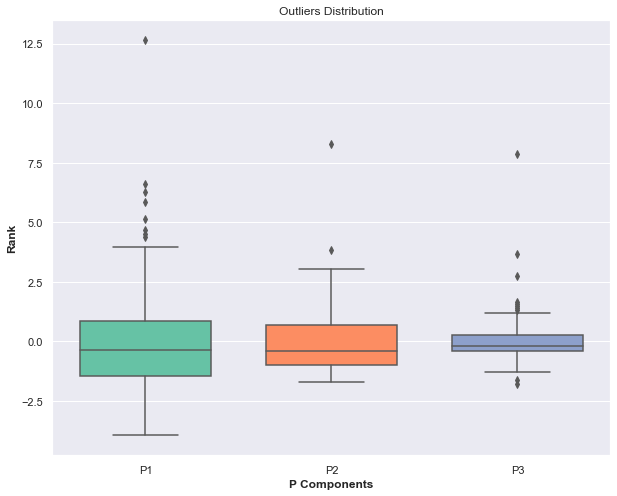

In [144]:
outliers = ['P1','P2','P3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_p_final[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Distribution")
plt.ylabel("Rank", fontweight = 'bold')
plt.xlabel("P Components", fontweight = 'bold')

In [146]:
# Outlier treatment P1

Q1 = df_p_final.P1.quantile(0.05)
Q3 = df_p_final.P1.quantile(0.95)
IQR = Q3 - Q1
df_p_final = df_p_final[(df_p_final.P1 >= Q1) & (df_p_final.P1 <= Q3)]

# Outlier treatment P2

Q1 = df_p_final.P2.quantile(0.05)
Q3 = df_p_final.P2.quantile(0.95)
IQR = Q3 - Q1
df_p_final = df_p_final[(df_p_final.P2 >= Q1) & (df_p_final.P2 <= Q3)]

# Outlier treatment P3

Q1 = df_p_final.P3.quantile(0.05)
Q3 = df_p_final.P3.quantile(0.95)
IQR = Q3 - Q1
df_p_final = df_p_final[(df_p_final.P3 >= Q1) & (df_p_final.P3 <= Q3)]

Text(0.5, 0, 'P Components')

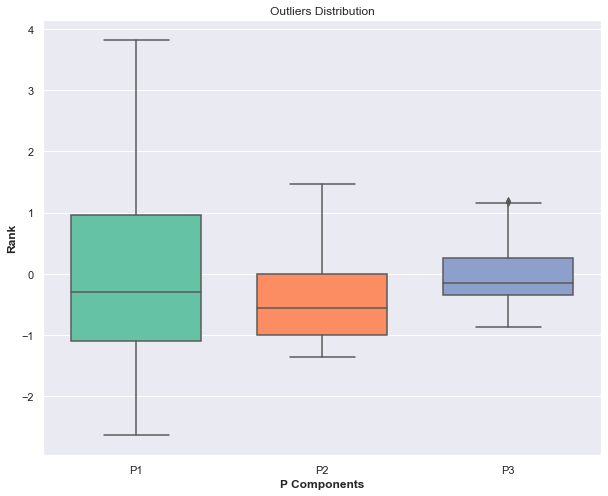

In [147]:
# Outlier removal 

outliers = ['P1','P2','P3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_p_final[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Distribution")
plt.ylabel("Rank", fontweight = 'bold')
plt.xlabel("P Components", fontweight = 'bold')

In [148]:
df_p_final = df_p_final.reset_index(drop=True)
df_p_final_data = df_p_final.drop(['country'],axis=1)
df_p_final.head()

,country,P1,P2,P3
0,Afghanistan,-2.6374,1.4690,-0.5414
1,Algeria,-0.4576,-0.6733,0.9619
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501
3,Armenia,-0.3327,-1.2745,0.1766
4,Australia,3.1804,-0.2508,-0.1169



## 6 : Modelling

### K- means Clustering

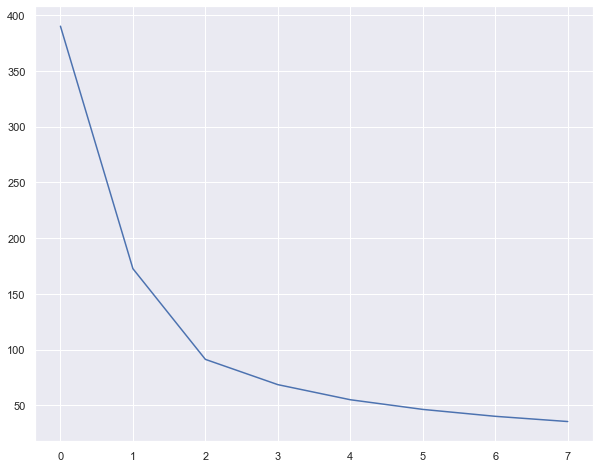

In [149]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=100)
    kmeans.fit(df_p_final_data)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

Elbow curve it looks good to go with 4 or 5 clusters.

### Silhouette Analysis

In [150]:
# Silhouette

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_p_final_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_p_final_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4873400103541441
For n_clusters=3, the silhouette score is 0.4639771456218248
For n_clusters=4, the silhouette score is 0.3987356568367148
For n_clusters=5, the silhouette score is 0.36085353704438133
For n_clusters=6, the silhouette score is 0.3714796089348357
For n_clusters=7, the silhouette score is 0.3609446319381151
For n_clusters=8, the silhouette score is 0.34963655749979905


In [151]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50, random_state= 100)
kmeans.fit(df_p_final_data)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [152]:
# Cluster labels

kmeans.labels_

array([3, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 3, 0, 0, 1, 2, 1, 0,
       1, 1, 3, 3, 0, 2, 0, 1, 1, 1, 1, 3, 0, 1, 2, 2, 3, 3, 1, 2, 3, 0,
       1, 1, 1, 0, 2, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 3, 2, 1, 3, 0, 3, 0,
       0, 3, 0, 0, 2, 3, 0, 1, 1, 1, 1, 3, 1, 2, 0, 3, 0, 1, 1, 1, 0, 0,
       0, 1, 3, 1, 0, 0, 2, 3, 3, 0, 2, 1, 3, 1, 2, 1, 3, 1, 1, 0, 1, 3,
       1, 2, 2, 2, 0, 1, 1, 1, 3])

In [153]:
# Assign the label

df_p_final['Clust_ID'] = kmeans.labels_
df_p_final.head()

,country,P1,P2,P3,Clust_ID
0,Afghanistan,-2.6374,1.4690,-0.5414,3
1,Algeria,-0.4576,-0.6733,0.9619,1
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501,0
3,Armenia,-0.3327,-1.2745,0.1766,1
4,Australia,3.1804,-0.2508,-0.1169,2


In [154]:
# Number of countries in each cluster

df_p_final['Clust_ID'].value_counts()

1    48
0    29
3    23
2    19
Name: Clust_ID, dtype: int64

In [67]:
# Lets drop the Cluster Id 4  and check with 5 clusters.

df_p_final = df_p_final.drop('Clust_ID',axis=1)

In [155]:
#K-means with k=5 clusters

kmeans5 = KMeans(n_clusters=5, max_iter=50, random_state= 100)
kmeans5.fit(df_p_final_data)

KMeans(max_iter=50, n_clusters=5, random_state=100)

In [156]:
# Cluster labels

kmeans5.labels_

array([1, 0, 3, 0, 2, 2, 0, 3, 3, 4, 3, 0, 4, 4, 4, 1, 0, 0, 4, 2, 4, 0,
       0, 0, 1, 1, 3, 2, 3, 0, 0, 4, 0, 1, 3, 4, 2, 2, 1, 1, 0, 2, 1, 3,
       0, 4, 4, 3, 2, 4, 4, 0, 1, 3, 2, 0, 2, 4, 0, 1, 2, 4, 1, 3, 1, 0,
       3, 1, 0, 0, 2, 1, 0, 4, 0, 4, 4, 1, 4, 2, 0, 1, 0, 0, 0, 4, 3, 3,
       0, 0, 1, 4, 3, 3, 3, 1, 1, 3, 3, 0, 1, 0, 2, 4, 1, 4, 0, 0, 4, 1,
       0, 2, 2, 2, 0, 4, 4, 0, 1])

In [157]:
# assign the label

df_p_final['Clust_ID'] = kmeans5.labels_
df_p_final.head()

,country,P1,P2,P3,Clust_ID
0,Afghanistan,-2.6374,1.4690,-0.5414,1
1,Algeria,-0.4576,-0.6733,0.9619,0
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501,3
3,Armenia,-0.3327,-1.2745,0.1766,0
4,Australia,3.1804,-0.2508,-0.1169,2


In [158]:
# Number of countries in each cluster

df_p_final['Clust_ID'].value_counts()

0    35
4    25
1    23
3    19
2    17
Name: Clust_ID, dtype: int64

There are good number of countries in each clusters.

In [161]:
merge_data = pd.merge(df_ngo,df_p_final,on='country')
merge_data_col = merge_data[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Clust_ID']]


clust_child = pd.DataFrame(merge_data_col.groupby(["Clust_ID"]).child_mort.mean())
clust_export = pd.DataFrame(merge_data_col.groupby(["Clust_ID"]).exports.mean())
clust_import = pd.DataFrame(merge_data_col.groupby(["Clust_ID"]).imports.mean())
clust_health = pd.DataFrame(merge_data_col.groupby(["Clust_ID"]).health.mean())
clust_income = pd.DataFrame(merge_data_col.groupby(["Clust_ID"]).income.mean())
clust_inflation = pd.DataFrame(merge_data_col.groupby(["Clust_ID"]).inflation.mean())         
clust_lifeexpec = pd.DataFrame(merge_data_col.groupby(["Clust_ID"]).life_expec.mean())
clust_totalfer = pd.DataFrame(merge_data_col.groupby(["Clust_ID"]).total_fer.mean())
clust_gdpp = pd.DataFrame(merge_data_col.groupby(["Clust_ID"]).gdpp.mean())

concat_data = pd.concat([pd.Series([0,1,2,3,4]),clust_child,clust_export,clust_import,clust_health,clust_income
                       ,clust_inflation,clust_lifeexpec,clust_totalfer,clust_gdpp], axis=1)
concat_data.columns = ["Clust_ID", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
concat_data.head()

,Clust_ID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,17.9000,2934.3289,2790.2077,417.9462,14125.7143,8.2583,74.0543,2.0854,6943.4286
1,1,68.4783,884.7745,838.6342,135.8739,4650.8696,10.7113,62.1696,4.5074,2152.7391
2,2,5.1412,16736.1118,15324.9353,3954.5006,41705.8824,2.8236,80.4765,1.7765,40911.7647
3,3,6.9000,9200.4895,9445.8053,1489.7879,25036.8421,0.9048,76.9579,1.6789,18810.5263
4,4,37.2160,931.7887,1241.5800,130.3515,5442.8000,6.6020,69.2320,2.9820,2416.8800


In [163]:
merge_data_col.head(10)

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Clust_ID
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,1
1,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,16.1000,76.5000,2.8900,4460,0
2,Antigua and Barbuda,10.3000,5551.0000,7185.8000,735.6600,19100,1.4400,76.8000,2.1300,12200,3
3,Armenia,18.1000,669.7600,1458.6600,141.6800,6700,7.7700,73.3000,1.6900,3220,0
4,Australia,4.8000,10276.2000,10847.1000,4530.8700,41400,1.1600,82.0000,1.9300,51900,2
5,Austria,4.3000,24059.7000,22418.2000,5159.0000,43200,0.8730,80.5000,1.4400,46900,2
6,Azerbaijan,39.2000,3171.1200,1208.8800,343.3920,16000,13.8000,69.1000,1.9200,5840,0
7,Bahamas,13.8000,9800.0000,12236.0000,2209.2000,22900,-0.3930,73.8000,1.8600,28000,3
8,Bahrain,8.6000,14386.5000,10536.3000,1028.7900,41100,7.4400,76.0000,2.1600,20700,3
9,Bangladesh,49.4000,121.2800,165.2440,26.6816,2440,7.1400,70.4000,2.3300,758,4


From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country.

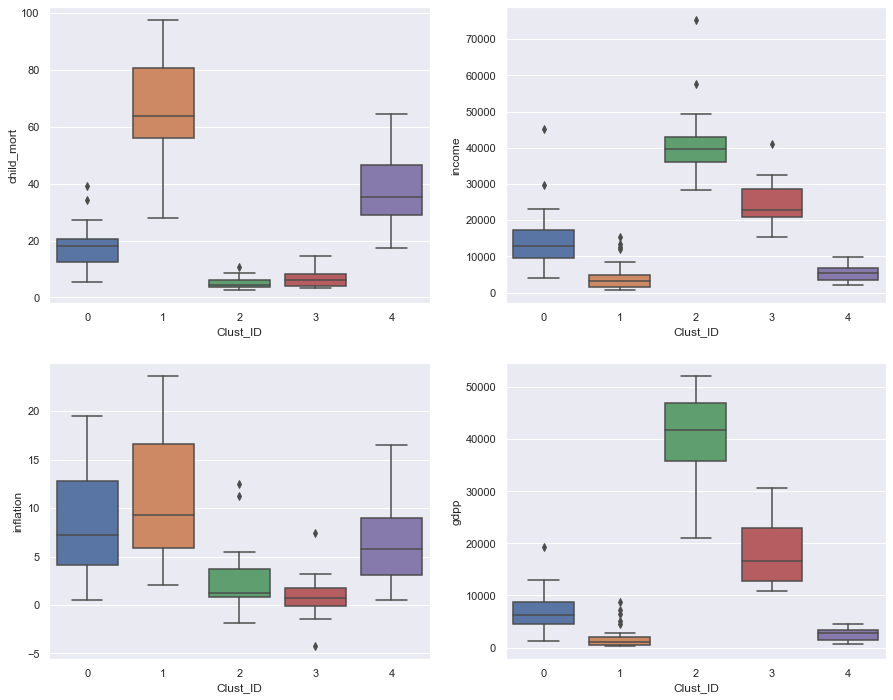

In [166]:
# Box plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Clust_ID', y = 'child_mort', data = merge_data_col,ax=axes[0][0])
sns.boxplot(x = 'Clust_ID', y = 'income', data = merge_data_col,ax=axes[0][1])
sns.boxplot(x = 'Clust_ID', y = 'gdpp', data=merge_data_col,ax=axes[1][1])
sns.boxplot(x = 'Clust_ID', y = 'inflation', data=merge_data_col,ax=axes[1][0])


- Child Mortality is highest for Cluster `0`  and Cluster `3`. Aid category.
- Income and Gdpp are of development category. Higher the per capita income and gdpp better is the country's development.
  Income per capita and gdpp are lowest for countries in clusters `0` and `3`. Help category

In [167]:
#Cluster 0

merge_data_col[merge_data_col['Clust_ID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Clust_ID
1,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,16.1000,76.5000,2.8900,4460,0
3,Armenia,18.1000,669.7600,1458.6600,141.6800,6700,7.7700,73.3000,1.6900,3220,0
6,Azerbaijan,39.2000,3171.1200,1208.8800,343.3920,16000,13.8000,69.1000,1.9200,5840,0
11,Belarus,5.5000,3099.4200,3889.3500,338.2830,16200,15.1000,70.4000,1.4900,6030,0
16,Brazil,19.8000,1198.4000,1321.6000,1009.1200,14500,8.4100,74.2000,1.8000,11200,0
17,Bulgaria,10.8000,3433.6800,3625.2000,469.9080,15300,1.1100,73.9000,1.5700,6840,0
21,Chile,8.7000,4863.3000,4037.7000,1026.8400,19400,8.9600,79.1000,1.8800,12900,0
22,China,15.7000,1199.2800,1030.5600,231.1920,9530,6.9400,74.6000,1.5900,4560,0
23,Colombia,18.6000,993.7500,1112.5000,474.3750,10900,3.8600,76.4000,2.0100,6250,0
29,Dominican Republic,34.4000,1237.1500,1814.8500,338.9900,11100,5.4400,74.6000,2.6000,5450,0


In [169]:
# Cluster 3

merge_data_col[merge_data_col['Clust_ID']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Clust_ID
2,Antigua and Barbuda,10.3000,5551.0000,7185.8000,735.6600,19100,1.4400,76.8000,2.1300,12200,3
7,Bahamas,13.8000,9800.0000,12236.0000,2209.2000,22900,-0.3930,73.8000,1.8600,28000,3
8,Bahrain,8.6000,14386.5000,10536.3000,1028.7900,41100,7.4400,76.0000,2.1600,20700,3
10,Barbados,14.2000,6320.0000,7792.0000,1275.2000,15300,0.3210,76.7000,1.7800,16000,3
26,Croatia,5.5000,5076.0000,5143.5000,1047.6000,20100,0.8210,76.3000,1.5500,13500,3
28,Czech Republic,3.4000,13068.0000,12454.2000,1560.2400,28300,-1.4300,77.5000,1.5100,19800,3
34,Estonia,4.5000,10964.6000,10030.2000,880.3800,22700,1.7400,76.0000,1.7200,14600,3
43,Greece,3.9000,5944.9000,8258.3000,2770.7000,28700,0.6730,80.4000,1.4800,26900,3
47,Hungary,6.0000,10715.8000,10021.5000,960.2300,22300,2.3300,74.5000,1.2500,13100,3
53,Israel,4.6000,10710.0000,10067.4000,2334.7800,29600,1.7700,81.4000,3.0300,30600,3


### Hierarchical Clustering

In [170]:
df_p_final_data.head()

,P1,P2,P3
0,-2.6374,1.4690,-0.5414
1,-0.4576,-0.6733,0.9619
2,0.6498,-1.0244,-0.2501
3,-0.3327,-1.2745,0.1766
4,3.1804,-0.2508,-0.1169


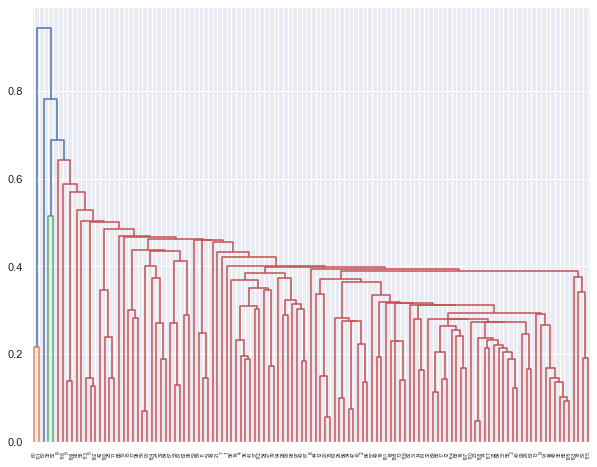

In [171]:
# Single linkage

unite = linkage(df_p_final_data, method='single',metric='euclidean')
dendrogram(unite)
plt.show()

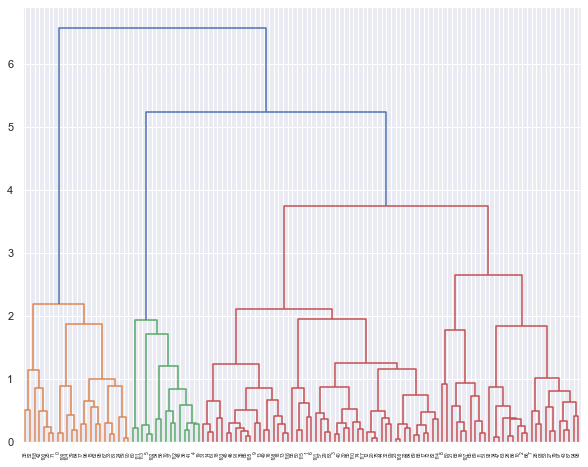

In [172]:
# Complete Linkage

unite = linkage(df_p_final_data, method='complete',metric='euclidean')
dendrogram(unite)
plt.show()

In [173]:
hc_p_df = df_p_final.copy()
hc_p_df = hc_p_df.drop('Clust_ID',axis=1)
hc_p_df.head()

,country,P1,P2,P3
0,Afghanistan,-2.6374,1.4690,-0.5414
1,Algeria,-0.4576,-0.6733,0.9619
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501
3,Armenia,-0.3327,-1.2745,0.1766
4,Australia,3.1804,-0.2508,-0.1169


In [174]:
# Cut tree at height of approximate 3 to get 4 clusters

clust_chop = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
hc = pd.concat([hc_p_df, clust_chop], axis=1)
hc.columns = ['country', 'PC_1', 'PC_2','PC_3','Clust_ID']

In [175]:
hc.head()

,country,PC_1,PC_2,PC_3,Clust_ID
0,Afghanistan,-2.6374,1.4690,-0.5414,0
1,Algeria,-0.4576,-0.6733,0.9619,1
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501,2
3,Armenia,-0.3327,-1.2745,0.1766,1
4,Australia,3.1804,-0.2508,-0.1169,3


#### Inference:
Cluster `4` seems to be not properly formed in Plot 1.

In [177]:
# Merging the df with PCA with original df

merge_hc = pd.merge(df_ngo,hc,on='country')
merge_hc_col = merge_data[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Clust_ID']]

In [178]:
merge_hc_col.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Clust_ID
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,1
1,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,16.1000,76.5000,2.8900,4460,0
2,Antigua and Barbuda,10.3000,5551.0000,7185.8000,735.6600,19100,1.4400,76.8000,2.1300,12200,3
3,Armenia,18.1000,669.7600,1458.6600,141.6800,6700,7.7700,73.3000,1.6900,3220,0
4,Australia,4.8000,10276.2000,10847.1000,4530.8700,41400,1.1600,82.0000,1.9300,51900,2


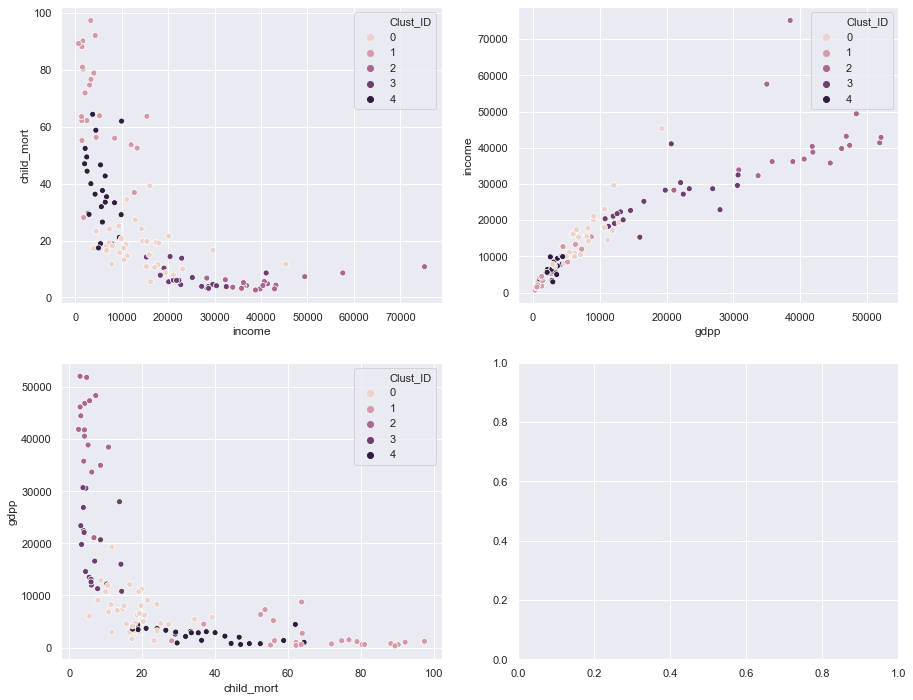

In [179]:
# Scatter plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.scatterplot(x = 'income', y = 'child_mort',hue='Clust_ID',data = merge_hc_col,legend='full',ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Clust_ID', data = merge_hc_col,legend='full',ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Clust_ID', data=merge_hc_col,legend='full',ax=axes[1][0])

We will proceed with the clusters formed by K-means and based on the information. We will finalise the final countries which are in need of aid.

## 7 : Final 

We got Cluster 0 and Cluster 3 which are in need of aid.

In [180]:
clust0 = merge_data_col[merge_data_col['Clust_ID'] ==0]

In [182]:
clust3 = merge_data_col[merge_data_col['Clust_ID'] ==3]

In [183]:
# List of countries which need help

df_append= clust0.append(clust3)

In [184]:
df_append.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Clust_ID
1,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,16.1000,76.5000,2.8900,4460,0
3,Armenia,18.1000,669.7600,1458.6600,141.6800,6700,7.7700,73.3000,1.6900,3220,0
6,Azerbaijan,39.2000,3171.1200,1208.8800,343.3920,16000,13.8000,69.1000,1.9200,5840,0
11,Belarus,5.5000,3099.4200,3889.3500,338.2830,16200,15.1000,70.4000,1.4900,6030,0
16,Brazil,19.8000,1198.4000,1321.6000,1009.1200,14500,8.4100,74.2000,1.8000,11200,0


In [185]:
df_append.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Clust_ID
count,54.0000,54.0000,54.0000,54.0000,54.0000,54.0000,54.0000,54.0000,54.0000,54.0000
mean,14.0296,5139.0891,5131.9920,795.0757,17964.8148,5.6709,75.0759,1.9424,11118.8889,1.0556
std,8.0369,4098.7549,3823.6282,709.0333,8918.7656,5.5445,3.1693,0.4792,7561.1142,1.4461
min,3.2000,638.9600,1030.5600,89.6040,3910.0000,-4.2100,68.4000,1.2300,1310.0000,0.0000
25%,7.2000,1613.9575,1588.0225,338.4597,10600.0000,1.2075,73.3250,1.5550,5547.5000,0.0000
50%,14.0000,4052.4700,3757.6950,477.1875,17250.0000,4.1500,74.6500,1.9000,9070.0000,0.0000
75%,19.1750,7834.1250,8035.9000,1005.2525,22600.0000,8.5150,76.7750,2.2150,13400.0000,3.0000
max,39.2000,15046.2000,14718.6000,2928.7800,45300.0000,19.5000,81.9000,3.0300,30700.0000,3.0000


In [186]:
# Based on final clusters information we are going to finalise the final list.

final_data_list = df_ngo[df_ngo['child_mort']>53]
final_data_list.shape

(48, 10)

In [187]:
# Let's check the demographic of the resultant data again

final_data_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000
mean,93.0208,848.1537,97.5164,754.1698,3695.0625,11.6195,59.5500,4.9121,1797.5000
std,32.4204,2266.2194,149.2196,1509.6237,5325.9968,15.4064,6.5526,1.1486,2852.8295
min,53.7000,1.0769,12.8212,0.6511,609.0000,0.8850,32.1000,2.4100,231.0000
25%,63.8500,101.6303,31.9700,188.8055,1390.0000,3.7925,56.7250,4.3450,551.5000
50%,89.7500,188.2900,48.7265,313.8570,1900.0000,8.2150,60.2500,5.0550,932.0000
75%,111.0000,417.9150,72.7850,571.8375,3785.0000,16.2250,63.8500,5.5975,1377.5000
max,208.0000,14671.8000,766.0800,10071.9000,33700.0000,104.0000,71.1000,7.4900,17100.0000


In [188]:
# Take all the countries with less than this income .

final_data_list0 = final_data_list[final_data_list['income']<=3695]
final_data_list0.shape

(35, 10)

In [189]:
# Let's check the demographic of the resultant data again

final_data_list0.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000
mean,98.7200,190.7614,56.9363,352.9760,1735.8000,8.4913,58.3771,5.2526,831.2000
std,32.8870,159.7151,56.7278,280.1672,769.1895,6.6906,6.9571,0.8977,606.5572
min,55.2000,20.6052,12.8212,90.5520,609.0000,0.8850,32.1000,3.3000,231.0000
25%,75.7000,80.3515,31.5122,170.5340,1215.0000,2.7900,56.2500,4.8100,470.5000
50%,90.5000,131.9850,41.9174,254.5600,1540.0000,6.3900,58.7000,5.2100,648.0000
75%,112.5000,224.5845,57.8575,400.2865,2135.0000,12.2000,62.0000,5.7650,1085.0000
max,208.0000,617.3200,328.3200,1190.5100,3370.0000,26.5000,71.1000,7.4900,3600.0000


In [190]:
 # Take all the countries with less than this gdpp .

final_data_list1 = final_data_list0[final_data_list0['gdpp']<=831]
final_data_list1.shape

(23, 10)

#### List of countries which are in need of the aid based on socio-economic factors.

In [191]:
final_data_list1['country']

0      Afghanistan             
17     Benin                   
25     Burkina Faso            
26     Burundi                 
31     Central African Republic
36     Comoros                 
37     Congo, Dem. Rep.        
50     Eritrea                 
56     Gambia                  
63     Guinea                  
64     Guinea-Bissau           
66     Haiti                   
88     Liberia                 
93     Madagascar              
94     Malawi                  
97     Mali                    
106    Mozambique              
112    Niger                   
126    Rwanda                  
132    Sierra Leone            
147    Tanzania                
150    Togo                    
155    Uganda                  
Name: country, dtype: object